# Apple Mobility Trend Analysis
### **Author**: Nishanth Shyam

In this notebook, I will be using the data available from: https://www.apple.com/covid19/mobility. I'll be focusing on UK cities but will compare to other major countries and cities to see if there are any trends which are common amongst them.

In [35]:
# Install packages
import pandas
import matplotlib.pyplot as plt
import datetime

# Read the data file
mobility_data = pandas.read_csv("applemobilitytrends-2020-04-13.csv")

Let's look at the data from the file to get a gauge as to the format and what data we have to work with and can compare.

In [2]:
mobility_data.head()

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,20.54,22.54,26.40,26.03,26.43,26.70,26.32,25.47,24.89,32.64
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,24.90,23.92,31.13,25.80,29.81,28.96,27.29,27.63,29.59,35.52
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,15.13,11.53,17.24,18.55,19.95,19.80,16.80,19.40,12.89,21.10
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,...,10.97,9.12,11.85,13.49,15.51,14.65,13.58,15.75,10.45,16.35
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,...,33.34,51.75,53.17,55.01,59.24,33.19,36.00,26.95,31.72,53.14


As we can see, we have a wide table with all the dates as separate columns. While this was probably the best way to show this data without having region and transportation type repeated multiple times, it doesn't make plotting this data or filtering through this data very useful. We will need to isolate the region and the transportation type and then transpose the date columns to make it possible to plot.

Firstly, we will check what regions and transportation types we have available?

In [3]:
mobility_data['transportation_type'].unique()

array(['driving', 'walking', 'transit'], dtype=object)

In [4]:
mobility_data['region'].unique()

array(['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'Colombia',
       'Croatia', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao', 'Malaysia',
       'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Norway',
       'Philippines', 'Poland', 'Portugal', 'Republic of Korea',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UK',
       'United States', 'Ukraine', 'United Arab Emirates', 'Uruguay',
       'Vietnam', 'Amsterdam', 'Athens', 'Atlanta', 'Auckland',
       'Baltimore', 'Bangkok', 'Barcelona', 'Berlin', 'Birmingham - UK',
       'Bochum - Dortmund', 'Boston', 'Brisba

In [5]:
mobility_data['region'].nunique()

152

We have 3 different transportation types but as we can see from the head of the table, some places do not have transit data. Looking at the region, we have a mix between countries and major cities and a total of 152 unique places. We can see what places actually have the transit data.

In [6]:
mobility_data[mobility_data['transportation_type'] == 'transit']

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13
5,country/region,Australia,transit,100,101.78,100.64,99.58,98.34,86.97,99.87,...,16.62,21.76,21.20,20.73,21.28,16.63,16.78,13.94,16.51,21.67
10,country/region,Belgium,transit,100,98.67,105.01,105.87,113.55,110.73,100.53,...,23.19,25.02,23.97,25.85,26.39,26.70,26.55,27.17,26.24,23.95
13,country/region,Brazil,transit,100,102.45,104.28,100.20,97.06,81.01,69.05,...,19.08,17.13,24.12,23.47,23.39,23.16,18.19,19.19,15.71,24.36
20,country/region,Canada,transit,100,100.03,98.01,101.01,105.42,89.65,75.87,...,17.33,16.32,18.84,17.90,18.10,17.74,16.45,16.78,14.93,18.09
29,country/region,Czech Republic,transit,100,98.02,101.88,103.30,107.22,101.48,92.46,...,17.76,22.11,21.14,23.39,24.89,27.48,26.01,26.47,25.43,21.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,city,Toulouse,transit,100,93.78,103.04,103.39,110.60,102.12,93.00,...,19.93,23.32,30.39,27.84,24.59,29.05,29.19,29.26,23.89,26.36
382,city,Utrecht,transit,100,100.14,107.34,105.63,101.60,90.84,80.89,...,20.07,25.17,24.21,26.74,28.45,29.77,27.81,23.74,23.32,26.35
385,city,Vancouver,transit,100,93.81,86.78,96.86,104.61,96.55,78.93,...,18.04,17.69,20.94,19.59,20.15,19.31,19.51,18.63,17.18,19.21
390,city,Washington DC,transit,100,100.78,103.92,105.02,112.26,96.01,87.76,...,16.45,15.54,18.87,17.59,18.79,16.92,17.76,16.99,14.23,17.01


We can see we have 91 out of a total 152 unique regions and they are a mix of countries and cities. By the looks of it, they seem to only show major countries and cities with transit data which makes sense as Apple would not have data for every country or city. This is just something to keep in mind going forward.

Now that we know what kind of data we are working with, we can start plotting and comparing different cities and countries using various transportation types. We will start with the  UK cities which I have identified from this dataset. They are: London, Leeds, Birmingham, and Manchester.

Firstly I will create a function that will take the city or country and the transportation type and create a separate data frame with the transposed date columns as separate rows and the corresponding values. This will allow us to plot them effectively.

In [7]:
# Function to transpose the data. Currently the date values are columns and so we need to make these rows
# to make plotting the data easier
def transpose_df(region_name, transportation):
    # First choose the region and transportation type to create the usable dataframe
    df = mobility_data[(mobility_data['region'] == region_name) &
                       (mobility_data['transportation_type'] == transportation)]
    # Drop the geo_type column as it isn't useful anymore
    df = df.drop(['geo_type'], axis=1)
    # Pivots the dataframe from a wide to a tall format. Move the Date and Values as separate rows and corresponding
    # columns.
    df_t = df.melt(['region', 'transportation_type'], var_name='Date', value_name='Value')
    # Convert date column to datetime column
    df_t.Date = pandas.to_datetime(df_t.Date, format='%Y-%m-%d')
    # Make date column the index column to allow for easier plotting
    df_t.set_index('Date', inplace=True)
    # Values are currently percentages with the first value being the baseline. To make it a change in
    # baseline mobility, minus all values by the first value.
    df_t.Value = df_t.Value - df_t.Value.iloc[0]
    # Round all the values to 2 decimal places
    df_t.Value = df_t.Value.round(2)
    # Return the finished dataframe, ready to plot
    return df_t

Now that we have this function, we can use this to create data frames for each of our UK cities so we can compare them graphically. We will be using the 'walking' transportation type initially to compare them all.

In [8]:
london = transpose_df('London', 'walking')
manchester = transpose_df('Manchester', 'walking')
birmingham = transpose_df('Birmingham - UK', 'walking')
leeds = transpose_df('Leeds', 'walking')

In [9]:
london.head()

,region,transportation_type,Value
Date,,,
2020-01-13,London,walking,0.00
2020-01-14,London,walking,8.89
2020-01-15,London,walking,16.84
2020-01-16,London,walking,18.82
2020-01-17,London,walking,32.18


As we can see from the london data frame example above, we now have a single data column with all the dates as rows and their corresponding values in the Value column. We also keep the region and transportation type columns which causes a lot of duplication but I felt it was better to keep them in there in case someone were to revisit this data frame later on in the code and wanted to know what it was showing. These columns can just as easily be removed as well.

Before we plot this data it is important to define what the values actually mean and why we subtracted every value by the first value. From the Apple Mobility Trends Report website, noted above, we see that the value corresponds to the "relative amount of directions requests per country/region or city compared to a baseline volume on January 13th 2020". If we look back at the initial view of the data when we first loaded it in, the baseline started at 100 and so by subtracting 100 from every value, we can display the graph as the percentage change from the baseline.

Now we can plot this data.

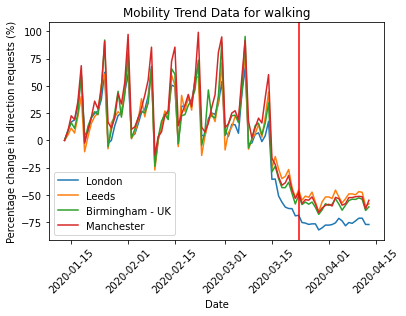

In [10]:
data = [london, leeds, birmingham, manchester]
# Iterate through every dataframe passed through this function
for frame in data:
    # Plot the date against the corresponding value
    plt.plot(frame.index, frame['Value'], label=frame['region'][0])

plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Percentage change in direction requests (%)')
plt.title('Mobility Trend Data for ' + data[0]['transportation_type'][0])
# Plot vertical line for when the UK went into lockdown
plt.axvline(pandas.Timestamp('2020-03-23'), color='red')
plt.show()

On the graph, I have identified the date that the UK went into lockdown which was March 23rd 2020. In the run up to the lockdown, we can see that there is a pattern of increases and decreases in direction requests amongst all cities before the significant dip just before March 15th 2020.

If we look further into the data we can identify which days saw the sharp increases and which days showed the subsequent decreases. We can also look further into the abnormal dip seen between February 1st 2020 and February 15th 2020 which saw the direction requests dip further than normal.

Firstly, we will focus on the cyclical pattern before the significant change. We will look specifically at London and Birmingham as the 2 largest cities of the 4 available in the dataset.

In [11]:
london[london['Value'] > 50].sort_index()

,region,transportation_type,Value
Date,,,
2020-01-18,London,walking,60.29
2020-01-25,London,walking,62.41
2020-02-01,London,walking,61.17
2020-02-08,London,walking,67.80
2020-02-14,London,walking,50.77
2020-02-21,London,walking,53.95
2020-02-22,London,walking,70.22
2020-02-29,London,walking,53.92
2020-03-07,London,walking,67.10


In [12]:
birmingham[birmingham['Value'] > 50].sort_index()

,region,transportation_type,Value
Date,,,
2020-01-18,Birmingham - UK,walking,61.21
2020-01-25,Birmingham - UK,walking,92.10
2020-02-01,Birmingham - UK,walking,82.14
2020-02-08,Birmingham - UK,walking,66.45
2020-02-14,Birmingham - UK,walking,65.71
2020-02-15,Birmingham - UK,walking,60.79
2020-02-22,Birmingham - UK,walking,73.57
2020-02-29,Birmingham - UK,walking,89.70
2020-03-07,Birmingham - UK,walking,95.42


To find the days which we have spikes, I've taken a 50% increase as the threshold to look at. We can see that most of the dates for both cities line up and looking at the calendar we can see these dates are all Saturday's. This would make sense as it is the start of the weekend and people and families are most likely to be walking to new places and so will need directions. I would expect the days with the dips to be on a Monday as everyone returns to work but we can confirm this by looking at all the dates before the significant dip at around March 15th 2020 and percentages less than 0.

In [13]:
london[(london['Value'] <= 0) & (london.index < pandas.Timestamp('2020-03-15'))]

,region,transportation_type,Value
Date,,,
2020-01-13,London,walking,0.00
2020-01-26,London,walking,-2.84
2020-02-09,London,walking,-23.21
2020-02-16,London,walking,-3.97
2020-03-08,London,walking,-3.14
2020-03-09,London,walking,-2.50
2020-03-12,London,walking,-1.13


In [14]:
birmingham[(birmingham['Value'] <= 0) & (birmingham.index < pandas.Timestamp('2020-03-15'))]

,region,transportation_type,Value
Date,,,
2020-01-13,Birmingham - UK,walking,0.00
2020-01-19,Birmingham - UK,walking,-1.68
2020-01-26,Birmingham - UK,walking,-5.85
2020-02-09,Birmingham - UK,walking,-23.77
2020-02-16,Birmingham - UK,walking,-3.02
2020-02-23,Birmingham - UK,walking,-4.57
2020-03-08,Birmingham - UK,walking,-6.96


As we can see again, the dates generally line up with each other and they are all Sunday's which makes sense as people get ready for the working week ahead. We can also see that big dip happened on February 9th 2020 for both cities. 

Looking at headlines and major events that happened on the 9th February, we found that Storm Ciara had reached a peak and the Environment Agency had issued 186 flood alerts, 251 flood warnings, and 1 severe flood warning. Train companies had also issued "do not travel" warnings as well as a number of flights and ferries being cancelled. This is the most likely reason to have caused the significant dip as people were urged to stay at home due to the conditions of the storm. You can read more about Storm Ciara on this day [here](https://www.independent.co.uk/travel/news-and-advice/storm-ciara-travel-flights-trains-cancelled-uk-weather-latest-british-airways-easyjet-a9325456.html).

We can now look closer at when the major dip on March 15th 2020 before the statewide lockdown that occurred om March 23rd 2020. We want to look at the exact that the dip happened so that we can see what was happening in the news during this time to see what could've caused this major dip. We confirm that March 15th 2020 is the date we need to look at below.

In [15]:
london[(london.index >= pandas.Timestamp('2020-03-14')) & (london.index <= pandas.Timestamp('2020-03-16'))]

,region,transportation_type,Value
Date,,,
2020-03-14,London,walking,17.44
2020-03-15,London,walking,-35.72
2020-03-16,London,walking,-35.47


In [16]:
birmingham[(birmingham.index >= pandas.Timestamp('2020-03-14')) & (birmingham.index <= pandas.Timestamp('2020-03-16'))]

,region,transportation_type,Value
Date,,,
2020-03-14,Birmingham - UK,walking,34.46
2020-03-15,Birmingham - UK,walking,-28.91
2020-03-16,Birmingham - UK,walking,-23.71


We can see that March 15th 2020 was where the biggest dip happened however, both cities saw a slight increase the day after possibly meaning that the dip was due to other issues happening. Looking at news sources on March 15th, we can see that the UK was hit again by another storm, Storm Dennis. You can read more about Storm Dennis on this day [here](https://www.independent.co.uk/travel/news-and-advice/storm-dennis-easyjet-flight-cancellations-half-term-gatwick-airport-heathrow-british-airways-a9337211.html). The severity of this Storm caused the Met Office to issue multiple severe weather warnings, requiring people to stay at home where possible. March 15th 2020 was just 1 week before the UK government announced a nationwide lockdown and so we can start looking at some actual coronavirus data. 

I am going to use data from the John Hopkins github repository found [here](https://github.com/CSSEGISandData/COVID-19). I will be focusing on the UK deaths compared with the direction requests shown above.

In [19]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

corona_data=pandas.read_csv(url, error_bad_lines=False)
corona_data.head()
    

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,23,25,30,30,30,33,36,36,40
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,24,25,26,26,26,26,26,26,27
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,313,326,336,348,364,367,375,384,392,402
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,29,31,33,33,35,35,36,37,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


As we can see, the format of this data is very similar to the format that we had before with the dates all set as columns and the countries and regions as separate rows. This means that we could use a modified version of the transpose_df function we created above to convert this table into a more usable format. First, let's check if the UK is present in this dataset.

In [22]:
corona_data[corona_data['Country/Region'] == 'United Kingdom']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
217,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
218,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
219,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,...,9,13,15,19,20,21,21,24,24,28
220,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,...,2,2,4,4,4,6,6,9,9,15
222,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,11329,12107,12868,13729,14576,15464,16060,16509,17337,18100
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


So we have the United Kingdom present but we also have a number of overseas territories as well present within this country divided using the Province/State column. We want to focus on mainland UK and so we will just target the row with an NaN value in the Province/State column.

In [30]:
uk_row = corona_data[(corona_data['Country/Region'] == 'United Kingdom') & (corona_data['Province/State'].isna())]
uk_row

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
223,NaN,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,11329,12107,12868,13729,14576,15464,16060,16509,17337,18100


Now that we have the row that we need, we can use a modified function from the one I have created earlier to get the data into a usable format for plotting. One thing also to note is that the dates are in mm/dd/yy format as opposed to the YYYY-mm-dd format used above. We will need to fix this as well.

In [42]:
# Function to transpose the data. Currently the date values are columns and so we need to make these rows
# to make plotting the data easier
def transpose_corona_row(df):
    # Drop the province/state, Lat, and Long columns as they aren't useful anymore
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    # Pivots the dataframe from a wide to a tall format. Move the Date and Values as separate rows and corresponding
    # columns.
    df_t = df.melt(['Country/Region'], var_name='Date', value_name='Value')
    # Convert date column to datetime column
    df_t.Date = pandas.to_datetime(df_t.Date)
    # Make date column the index column to allow for easier plotting
    df_t.set_index('Date', inplace=True)
    # Return the finished dataframe, ready to plot
    return df_t

In [44]:
UK_deaths = transpose_corona_row(uk_row)
UK_deaths

,Country/Region,Value
Date,,
2020-01-22,United Kingdom,0
2020-01-23,United Kingdom,0
2020-01-24,United Kingdom,0
2020-01-25,United Kingdom,0
2020-01-26,United Kingdom,0
...,...,...
2020-04-18,United Kingdom,15464
2020-04-19,United Kingdom,16060
2020-04-20,United Kingdom,16509


Now that we have the data in a format that we are happy with, we can see that the data for corona virus dates are different to the dates provided by Apple in the mobility report. This is fine as we saw that the mobility data established a baseline before showing the big drop. That being said we can still plot both onto the same graph and see how things change as the number of deaths increases within the UK.

Instead of plotting each individual city, I will be plotting the UK as a whole and using the walking data initially.

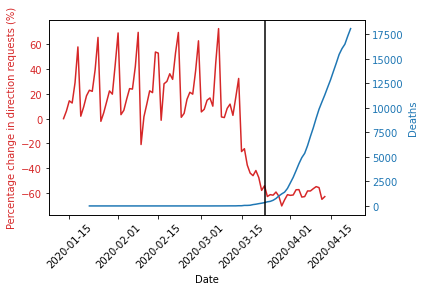

In [49]:
UK_walking = transpose_df('UK', 'walking')
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylabel('Percentage change in direction requests (%)', color=color)
ax1.plot(UK_walking.index, UK_walking['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(UK_deaths.index, UK_deaths['Value'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.axvline(pandas.Timestamp('2020-03-23'), color='black')
plt.show()